# Custo de Seguro Médico nos EUA

   Nesse projeto, iremos investigar os dados de seguros médicos, que estão organizados no arquivo **insurance.csv**, de 1388 pacientes estadunidenses, com idades entre 18 e 64 anos. O objetivo desse projeto é analisar os dados dos pacientes, de forma a obtermos insights sobre os diferentes atributos que fazem parte dos dados.    

Os dados estão organizados nas seguintes colunas

    1 - Idade
    2 - Sexo (M/F)
    3 - IMC
    4 - Nº de filhos
    5 - Fumante (0 para não fumante e 1 para fumante) 
    6 - Região
    7 - Custo do seguro
    
Com isso, podemos explorar diversas relações entre os dados como, por exemplo, a distribuição de idades dos pacientes, a razão entre fumantes e não fumantes, o número de pacientes por região geográfica e a diferença do custo do seguro para fumantes e não fumantes.  

Iniciamos fazendo a importação das bibliotecas que serão utilizadas nesse projeto:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Para armazenar os dados contidos no arquivo `insurance.csv`, vamos carregá-los no DataFrame `df`:

In [3]:
df = pd.read_csv('insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## Análise das idades dos pacientes

Com a função definida, podemos agora utilizá-la na análise da distribuição das idades dos pacientes. Iniciamos determinando a média, mediana e desvio padrão das idades, utilizando o código abaixo:

In [7]:
avg_age = df.age.mean()
median_age = df.age.median()
std_dev = df.age.std()

print(f"Average age: {avg_age:.1f} years")
print(f"Age Standard Deviation: {std_dev:.2f} years")
print(f"Median age: {median_age} years")

Average age: 39.2 years
Age Standard Deviation: 14.05 years
Median age: 39.0 years


A média de idade dos pacientes no arquivo é de **39.2 anos**, com um desvio padrão de 14.04 anos. Caso as idades dos pacientes seguissem uma distribuição normal, **68% dos pacientes teriam idades entre 25 e 53 anos**, entretanto, como virá na sequência, a distribuição dos dados não é uma gaussiana e, por isso, o desvio padrão apenas nos indica que temos uma grande variância nos dados. Além disso, também foi possível determinar a mediana das idades, que resultou em **39 anos**, muito próxima da média das idades.

Quando temos um conjunto numérico igualmente espaçado, ou de números consecutivos, a média é igual à mediana. Para o caso dos dados de idade dos pacientes, só seria possível termos uma média e medianas iguais caso o número de pessoas com cada uma das idades fosse o mesmo. Como temos valores muito próximos de média e mediana, para auxiliar essa análise, vamos considerar a distribuição de frequências de idades dos pacientes, organizadas no histograma gerado pelo código abaixo:

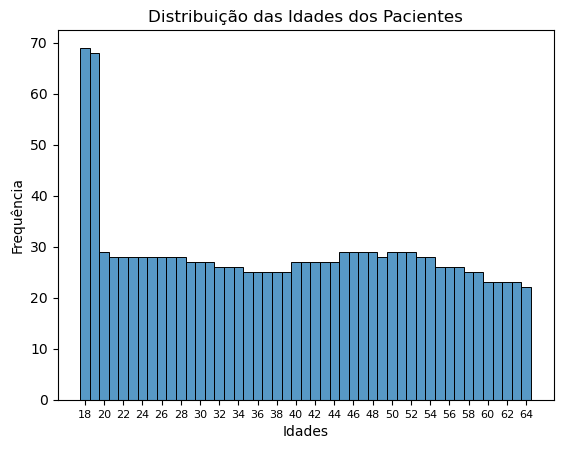

In [8]:
sns.histplot(data = df, x = "age", bins = np.arange(18, 66) - 0.5)
plt.xticks(np.arange(18,65,2), fontsize=8)
plt.title('Distribuição das Idades dos Pacientes')
plt.xlabel('Idades')
plt.ylabel('Frequência')

plt.show()

<p style='text-align: justify;'>  Observando a distribuição das idades dos pacientes, vemos que, com excessão às idades de 18 e 19 anos, temos uma distribuição de idades aproximadamente uniforme, ou seja, o número de pacientes com cada uma das idades é praticamente o mesmo. Como temos um maior número de pacientes com 18 e 19 anos, a mediana das idades acaba sendo um pouco inferior à média das idades. </p>

Além da distribuição das idades dos pacientes, podemos também investigar como o custo do seguro varia com a idade. Para isso, traçamos um gráfico de dispersão entre as idades e o custo do seguro, utilizando o código abaixo:

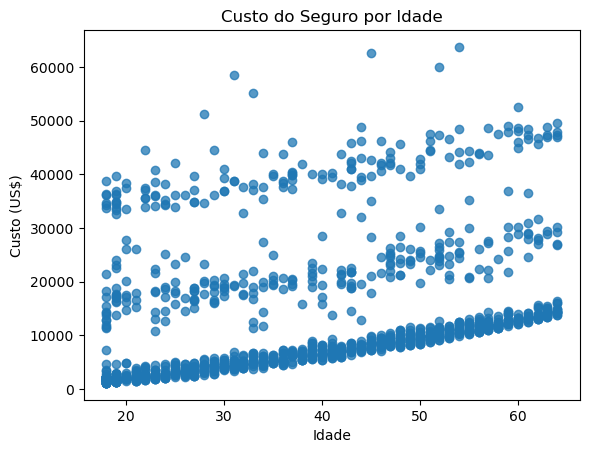

In [9]:
plt.scatter(df.age, df.charges, marker='o', alpha = 0.75)

plt.xlabel('Idade')
plt.ylabel('Custo (US$)')
plt.title('Custo do Seguro por Idade')
plt.show()

Observando o gráfico, vemos que os dados se dividem entre três agrupamentos principais. Em cada um deles, podemos ver uma tendência de crescimento do custo do seguro em relação à idade. Ou seja, **pacientes mais velhos pagam mais no seguro do que pacientes mais jovens**.

## Análise de custo - Homens x Mulheres

Também podemos investigar a relação entre o custo do seguro com o gênero dos pacientes. Iniciamos calculando a média de custo para pacientes homens e pacientes mulheres:

In [10]:
gender_group = df.groupby('sex').agg({'charges':'mean'})

print("Média de custo do seguro para pacientes homens e mulheres: \n")
print(gender_group)

Média de custo do seguro para pacientes homens e mulheres: 

             charges
sex                 
female  12569.578844
male    13956.751178


**A média de custo para pacientes homens é aproximadamente U$1400,00 maior que das mulheres**. Além da média, podemos observar a variabilidade do custo para gêneros. Para isso, iremos utilizar a biblioteca Seaborn para traçar gráficos de barra, com a média de custo por gênero e a as barras de erro correspondentes, usando o código abaixo:

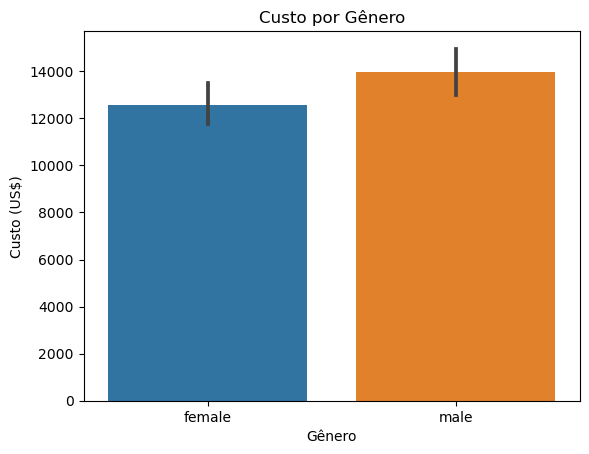

In [11]:
sns.barplot(data = df, x = "sex", y = "charges").set(title='Custo por Gênero')

plt.xlabel("Gênero")
plt.ylabel("Custo (US$)")

plt.show()

Observando o gráfico, vemos que o custo médio para pacientes homens é ligeiramente maior que o para pacientes mulheres. Entretanto, como a diferença entre ambos é pequena, podemos concluir que o custo do seguro não varia muito em relação ao gênero dos pacientes. 

## Análise de Custo - Nº de Filhos

Outro fator importante a ser levado em cosideração ao analisar os custos dos seguros médicos é o número de filhos por paciente. Instintivamente, somos levados a acreditar que quanto maior for o número de filhos, maior será o custo do seguro, por conta de elevadas despesas médicas de uma família grande. 

Tendo isso em mente, podemos determinar a média de custo para cada número de filhos, para confirmar, ou não, a nossa hipótese inicial, utilizando o código abaixo:

In [12]:
children_group = df.groupby("children")["charges"]

children_group.mean()

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

O que podemos ver acima, é que o custo médio do seguro por paciente cresce com o número de filhos até que atinge um máximo quando o número de filhos é igual a 3. Após isso, o custo médio do seguro diminui com o aumento de filhos. Para uma análise mais aprofundada, podemos visualizar a como o gráfico dos custos em relação ao número de filhos se comporta:

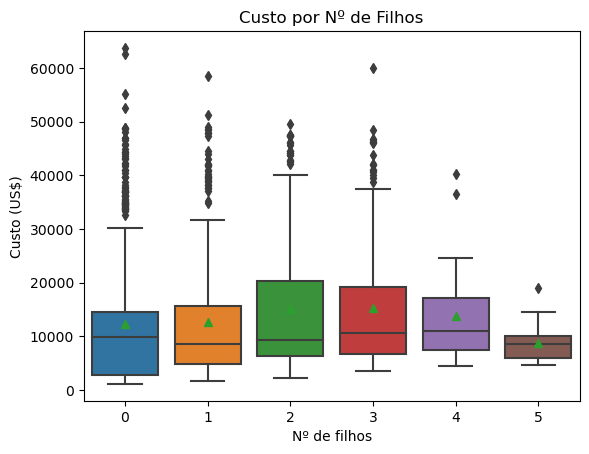

In [13]:
sns.boxplot(data = df, x = "children", y = "charges", showmeans=True).set(title='Custo por Nº de Filhos')
plt.xlabel('Nº de filhos')
plt.ylabel('Custo (US$)')

plt.show()

Observando o gráfico, pode-se concluir que, apesar da média de custo (representada pelos triângulos verdes) crescer com o número de filhos até que atinja 3, a mediana (linhas pretas horizontais dentro das caixa) não apresenta esse mesmo comportamento. Quando o número de filhos é zero, a mediana do custo é maior do que quando o numero de filhos é 1 ou 2. Isso é causado pelo número grande de outliers, que são pacientes com um custo elevado de seguro, provavelmente influenciados por outras características (fumantes, IMC alto, etc..).

Dessa análise, podemos concluir que o número de filhos impacta no valor do seguro, mas atinge um máximo quando o número de filhos é igual à três. A partir desse número, o custo do seguro só tende a diminuir.

## Análise de custo - Fumantes x Não-Fumantes

Outro fator interessante de ser analisado nos nossos dados é a relação entre o custo do seguro e tabagismo dos pacientes. Primeiramente, vamos determinar o número de pacientes fumantes utilizando o código abaixo:

In [14]:
smoker = 0

for i in df.smoker:
    if i == 'yes':
        smoker += 1
        
print(f'Number of smokers: {smoker}')
print(f'Number of non-smokers: {len(df) - smoker}')

Number of smokers: 274
Number of non-smokers: 1064


Dos 1338 pacientes nos dados, temos apenas 274 fumantes, que representa aproximadamente **20% do total de pacientes**. Além disso, podemos determinar a média do custo do seguro para pacientes fumantes e não fumantes: 

In [15]:
groups = df.groupby('smoker').agg({'charges':'mean'})

print("Média de custo do seguro para pacientes fumantes e não-fumantes: \n")
print(groups)

Média de custo do seguro para pacientes fumantes e não-fumantes: 

             charges
smoker              
no       8434.268298
yes     32050.231832


A média de custo para **pacientes fumantes** é de, aproximadamente, **US\$ 32050,00**, enquanto a média para **não-fumantes** é de apenas **US$8434,00**. Ou seja, pacientes fumantes tendem a pagar 4x mais, em média, pelo seguro médico. Dentre todas as caracteristicas até aqui analisadas, é a que apresentou uma maior influencia no valor do seguro. 

Podemos visualizar no gráfico abaixo a média e barras de erro para os custos dos pacientes fumantes e não-fumantes:

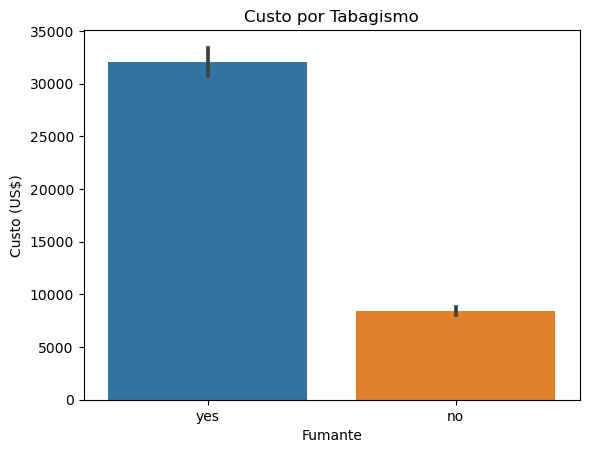

In [16]:
sns.barplot(data = df, x = "smoker", y = "charges").set(title='Custo por Tabagismo')

plt.xlabel("Fumante")
plt.ylabel("Custo (US$)")

plt.show()

Dentre todas as caracteristicas avaliadas nos nossos dados, a que mais influencia, de longe, o custo do seguro médico, é o tabagismo. De maneira a ilustrar melhor essa relação, vamos dividir a visualização entre fumantes e não fumantes na distribuição das outras caracteristicas dos dados.

Avaliando o custo de seguro por idade, para fumantes e não-fumantes, obtemos o seguinte gráfico:

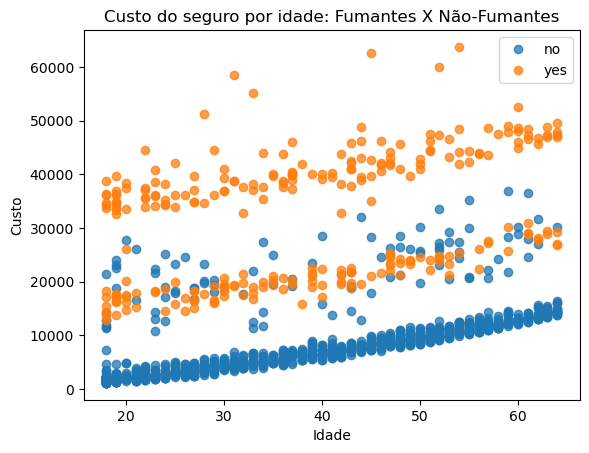

In [17]:
groups = df.groupby('smoker')

for name, group in groups:
    plt.plot(group.age, group.charges, marker='o', linestyle='', alpha = 0.75, label=name)

plt.legend()
plt.xlabel('Idade')
plt.ylabel('Custo')
plt.title('Custo do seguro por idade: Fumantes X Não-Fumantes')

plt.show()

Vemos que os pacientes que ocupam a parcela superior do gráfico, ou seja, que possuem os maiores custos para cada uma das idades, são todos fumantes. O mesmo comportamento se repete em cada uma das outras características dos pacientes, como por exemplo, os custos por nº de filhos e por sexo: 

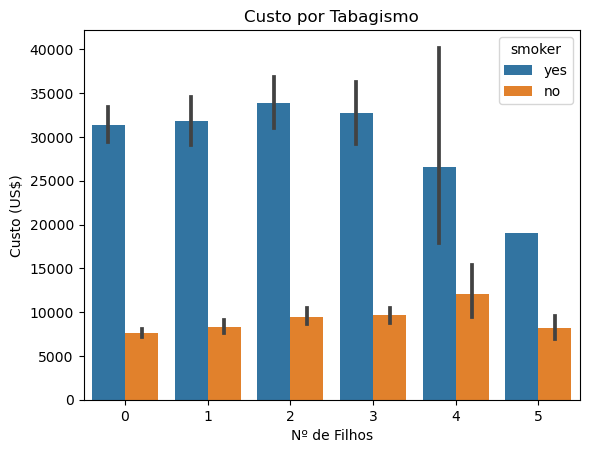

In [18]:
sns.barplot(data = df, x = "children", y = "charges", hue = "smoker").set(title='Custo por Tabagismo')

plt.xlabel("Nº de Filhos")
plt.ylabel("Custo (US$)")

plt.show()

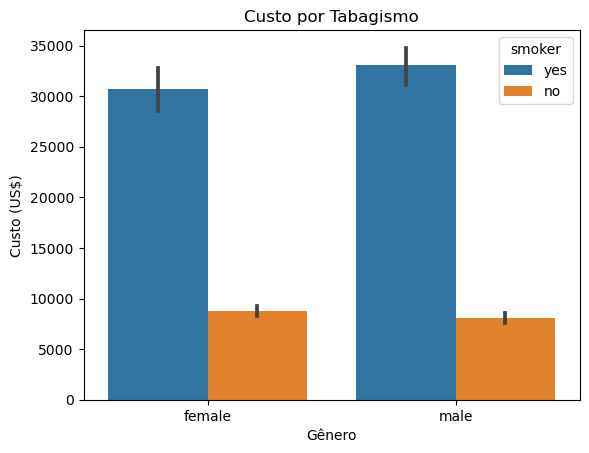

In [19]:
sns.barplot(data = df, x = "sex", y = "charges", hue = "smoker").set(title='Custo por Tabagismo')

plt.xlabel("Gênero")
plt.ylabel("Custo (US$)")

plt.show()

## Conclusões

Analisando os dados dos pacientes presentes nos dados, foi possível determinar como o custo do seguro médico varia com as características individuais de cada paciente (idade, sexo, nº de filhos, tabagismo). 

Foi possível determinar que o custo do seguro tende a crescer com a idade e com o tabagismo. O gênero do paciente não apresentou uma variação significativa no valor do seguro e o número de filhos acaba por ter um comportamento peculiar, o valor do seguro tende a crescer até 3 filhos, a partir desse número, o valor tende a diminuir significativamente. 

Dentre todas as caracteristicas analisadas aqui, a que apresentou uma maior influência no valor do seguro médico é o tabagismo dos pacientes, sendo que, o valor do seguro de pacientes fumantes é, em média, 4x maior que o valor médio do seguro para não-fumantes. 
